In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ql_core import Oriented2DGrid, QLAgent, train
from  utils import plot_rewards, visualize_policy

In [6]:
grid_obs = np.load("grids/grid_de_obstaculos.npy")
print(grid_obs)

[[0 0 0 0 1]
 [0 1 0 1 0]
 [0 0 0 0 0]
 [1 0 1 0 0]
 [0 0 0 0 0]]


In [7]:
# 1. Definição do Ambiente
X_SIZE = 5
Y_SIZE = 5
GRID_SIZE = (X_SIZE, Y_SIZE)
START_STATE = (0, 0, np.pi)  # (x, y, psi)
GOAL_STATE = (X_SIZE-1, Y_SIZE-1, 0)  # (x, y, psi)

print("Inicializando o ambiente...")
environment = Oriented2DGrid(
    grid_size=GRID_SIZE, start=START_STATE, goal=GOAL_STATE, actions_type="omni",
    reward_gains={"goal": 100.0, "invalid": 1000, "step": 1}  ,
    obs_grid=grid_obs
)

# 2. Definição do Agente com hiperparâmetros
print("Inicializando o agente Q-Learning...")
agent = QLAgent(
    state_shape=environment.state_shape,
    n_actions=environment.n_actions,
    learning_rate=0.2,
    discount_factor=0.9,
    e_greedy_type="linear"
)

# 3. Treinamento
print("Iniciando o treinamento do agente...")
data_backup = train(
    agent=agent,
    environment=environment,
    n_episodes=15000,  # Mais episódios para garantir a convergência
    verbose=True,
    verbose_interval=1000,
)
print("\nTreinamento concluído.")

Inicializando o ambiente...
Inicializando o agente Q-Learning...
Iniciando o treinamento do agente...
Episode 1000/15000 | Epsilon: 0.973
Episode 2000/15000 | Epsilon: 0.947
Episode 3000/15000 | Epsilon: 0.920
Episode 4000/15000 | Epsilon: 0.893
Episode 5000/15000 | Epsilon: 0.867
Episode 6000/15000 | Epsilon: 0.840
Episode 7000/15000 | Epsilon: 0.813
Episode 8000/15000 | Epsilon: 0.800
Episode 9000/15000 | Epsilon: 0.800
Episode 10000/15000 | Epsilon: 0.800
Episode 11000/15000 | Epsilon: 0.800
Episode 12000/15000 | Epsilon: 0.800
Episode 13000/15000 | Epsilon: 0.800
Episode 14000/15000 | Epsilon: 0.800
Episode 15000/15000 | Epsilon: 0.800

Treinamento concluído.


Gerando visualizações...


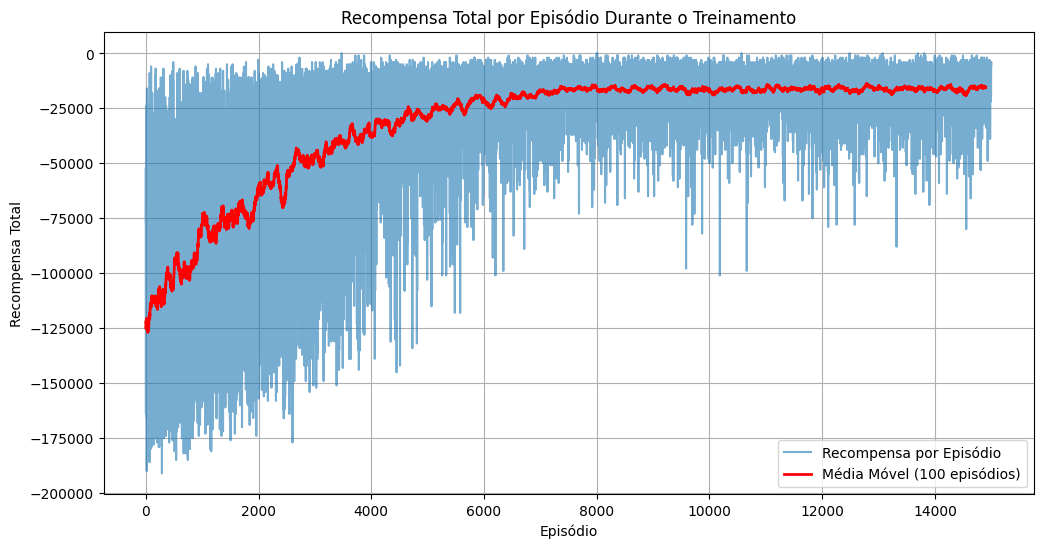

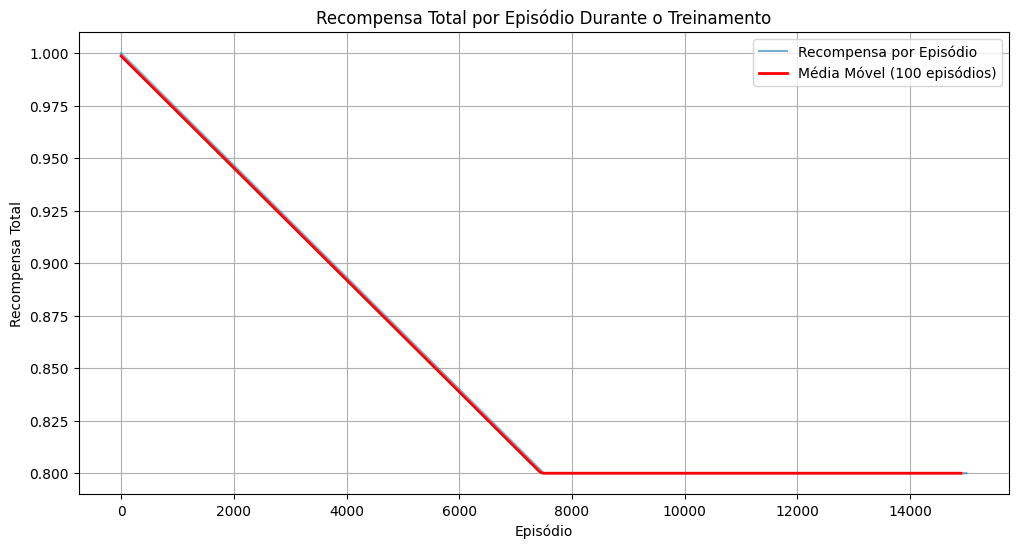

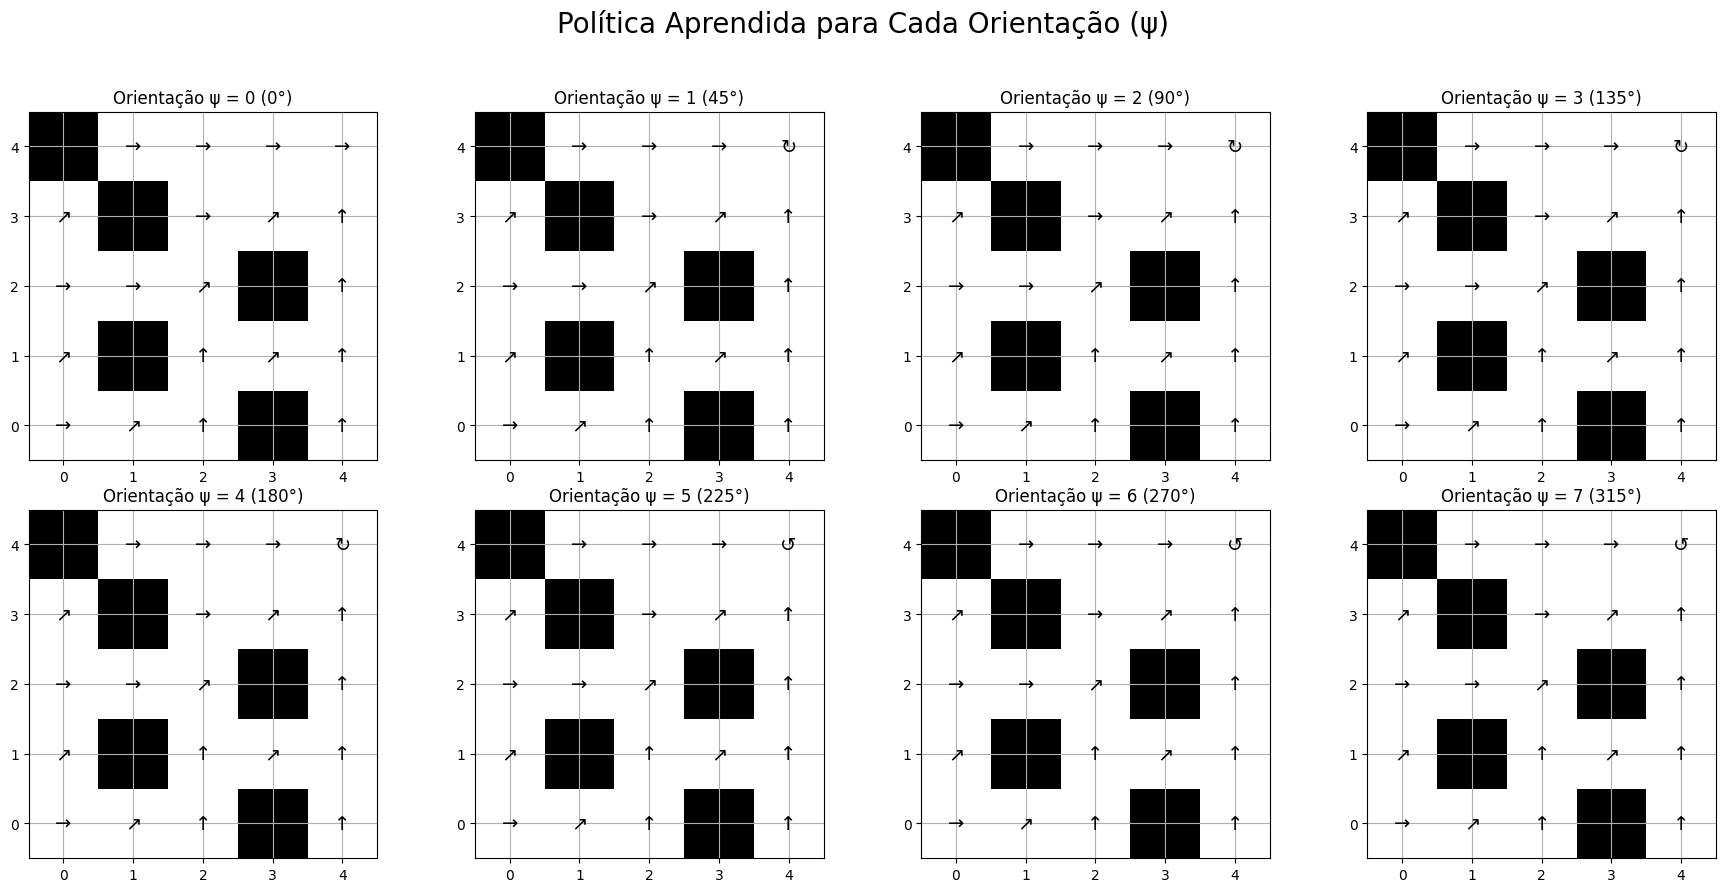

In [8]:
# 4. Visualização dos Resultados
print("Gerando visualizações...")

# Gráfico de Recompensas
plot_rewards(data_backup["rewards_history"])

# Gráfico da Taxa de Exploração (Epsilon)
plot_rewards(data_backup["epsilon_history"])

# Mapa da Política Aprendida
visualize_policy(agent, environment)